# LINEAR MODEL ASSUMPTION (CHECKING AND SOLUTION) 🐍

<img src="https://img.freepik.com/free-vector/attic-room-with-old-things-garret-with-roof-window-furniture-discreet-place-with-antique-switched-off-tv-set-radio-carton-boxes-wine-bottle-table-floor-lamp-cartoon-illustration_107791-3909.jpg?w=1060" width="800" height="350">

- **Motivation** : For some linear models, some assumptions must be fulfilled to ensure good model performance. 

- **Linear Models**
    - Linear Regression
    - Logistic Regression
    - Linear Discriminant Analysis (LDA)
    - etc
    
- **Linear Assumptions**
    - Linearity: Relationship between independent and dependent variables is linear
    - Normality: errors follow N(0,1)
    - Homoskedasticity: error variance is finite and constant (random disturbance in the relationship between the independent variables X and the dependent variable Y is the same across all the independent variables) 
    - Multicollinearity: no multi-collinearity among independent variables
    - (Note: almost all the assumptions are for the errors, which is unobservable, hence, we use its estimate-the residuals which is observable after fitting the model,to check these assumptions) 

- **What to do?**
    - Check whether the variables satisfy all assumptions before fitting, or conversely, we can fit the model, then do  diagnostics to inspect for any violations.
    - If they do NOT, then we have to transform variables so that it fulfil assumtions
    - If the transformation is difficult or roughly impossible, a change of model (may be non-linear) is a must.  

- **Methods of checking**
    - Linearity: Correlation Matrix, Scatter plot-Pair plot (x and y variable), Scatter plot (target-predicted values)
    - Normality: Residual histogram, Residual QQ-plot, Jarque-Bera test (residuals), Kolmogorov-Smirnov test (residuals)
    - Homoskedasticity: Scatter plot of residuals u on each x variable, Residual plots, Levene's test, Barlett's test,  White general test
    - Multi-collinearity: correlation matrix, scatter plot, VIF score (thres=5,10)
 
- **Solutions to Violations**   
    - Linearity: remove non-linear variable x(s)
    - Heteroskedasticity: Box-cox transformation on x(s), mathematical transformation (square, log, square-root), try more robust models
    - Non-normality: Box-Cox transformation on x(s), mathematical transformation (square, log, square-root) 
    - Multi-collinearity: remove highly collinear variable x(s), generate new feature (often from collinear features) , PCA

## Table of Content 🍔 🍟 🍕

- [FITTING SIMPLE LINEAR REGRESSION MODEL 🐠 ](#1)

- [RESIDUAL DIAGNOSTICS 🐟](#2)

- [LINEARITY CHECK 🐬 ](#3)
    - Correlation Matrix
    - Scatter Plot- Pair Plot : X(s) and y variables
    - Scattter plot : Target-Predicted variables
    - Residual Distribution
    
- [NORMALITY CHECK 🐝](#4)
    - Histogram (Residuals)
    - Jarque-Bera Test
    - Kolmogorov-Smirnov test
    
- [HOMOSKEDASTICITY CHECK 🐋](#5)
    - Scatter Plot
    - Levene Test- Bartlett Test
    - White Test
    
- [MULTICOLLINEARITY CHECK 🦈](#6)
    - Correlation Matrix- Scatter Plot
    - Variance Inflation Factor (VIF)
    
- [SOLUTION TO VIOLATION 🦄](#7)
    - Box-Cox Transformation
    - Principle Component Analysis (PCA)


In [2]:
# LIBRARY
# Main Packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Additional Packages
import warnings
warnings.filterwarnings("ignore")
# Train-test split 
from sklearn.model_selection import train_test_split
# Feature Scaling
from sklearn.preprocessing import StandardScaler
# linear regression model 
from sklearn.linear_model import LinearRegression
# MSE for linear regression model 
from sklearn.metrics import mean_squared_error

### FITTING SIMPLE LINEAR REGRESSION MODEL 🥑 <a class="anchor" id="1"></a>

In [3]:
# DATASET
# For this demo, we use 'original' linear regression model 🦌
data_lin_assumption= pd.read_csv('Advertising.csv')
display(data_lin_assumption.head(3),data_lin_assumption.columns, data_lin_assumption.shape,
       data_lin_assumption.corr())

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

(200, 4)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


MSE train: 5.077960008990877, MSE test: 5.569539193467244
error mean train:-3.9333615729576973e-16, error mean test: -0.2041713964512233


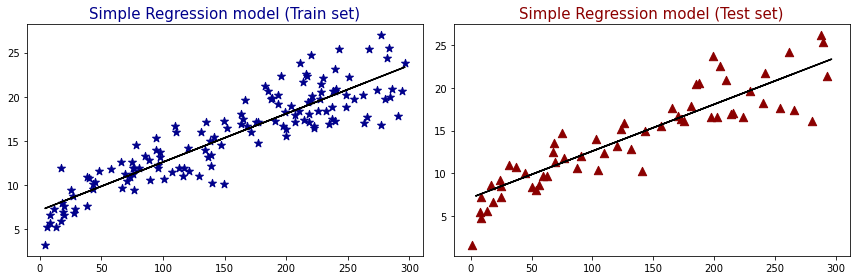

In [8]:
# LINEAR MODEL 
# With high correlation value:0.9, we decide X: TV, Y:Sale
X= data_lin_assumption['TV'].values.reshape(-1,1)
y= data_lin_assumption['Sales'].values.reshape(-1,1)

# Spliting Train-Test
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=0)

# Create Scaler
sc= StandardScaler() # scale the value of X into N(0,1) unit
sc.fit(X_train)

# Initialize and Train the Linear regression model 
lin_model= LinearRegression()
lin_model.fit(sc.transform(X_train), y_train)

# Calculate residuals and MSE on train and test set 
y_pred_train= lin_model.predict(sc.transform(X_train))
residual_train= y_train-y_pred_train
MSE_train= mean_squared_error(y_train,y_pred_train)

y_pred_test= lin_model.predict(sc.transform(X_test))
residual_test= y_test-y_pred_test
MSE_test= mean_squared_error(y_test,y_pred_test)
print(f'MSE train: {MSE_train}, MSE test: {MSE_test}')
print(f'error mean train:{np.mean(residual_train)}, error mean test: {np.mean(residual_test)}')

# Visualization on train and test set 
fig,ax= plt.subplots(ncols=2, figsize=(12,4))
# Train set
ax[0].scatter(X_train, y_train, color = 'darkblue', marker='*', s=70)
ax[0].plot(X_train, y_pred_train , color = 'black')
ax[0].set_title('Simple Regression model (Train set)', color='darkblue', fontsize=15)
# Test set
ax[1].scatter(X_test, y_test, color = 'darkred', marker='^', s=70)
ax[1].plot(X_train, y_pred_train, color = 'black')
ax[1].set_title('Simple Regression model (Test set)', color='darkred', fontsize=15)
fig.tight_layout();

### RESIDUALS DIAGNOSTICS (Yellowbrick) 🐟 <a class="anchor" id="2"></a>

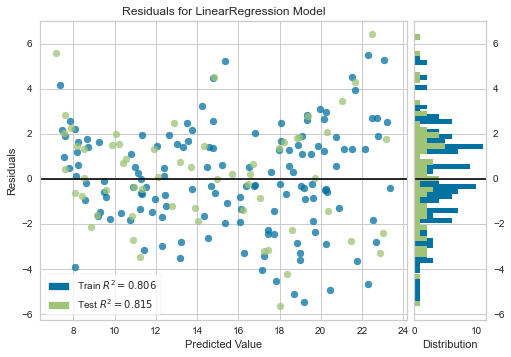

In [9]:
# There is a wonderful library for visualization of ML models' performance
# We can do Residual diagnostics by Yellowbrick
from yellowbrick.regressor import ResidualsPlot
visualizer= ResidualsPlot(lin_model)  # Initalize residual visualizer
visualizer.fit(sc.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(sc.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof();

- What we have: 
    - $R^2$ of model on train and test set: Compare the performances of model
    - Scatter plot of residual against values of y: Check homoskedasticity
    - Histogram of residuals on train and test set: Check Normality 

### LINEARITY CHECK 🐫 <a class="anchor" id="3"></a>

- **Correlation Matrix** 🦂
- Since correlation measure the linear relationship between 2 variables, the higher the value of correlation coefficient ($\rho$), the more likely that the pair of variables have linear relationship. 
- Note that, $\rho \in [-1,1]$, the sign of $\rho$ indicate positive or negative relationship, the magnitude of $\rho$ indicate strength of that linear relationship. 

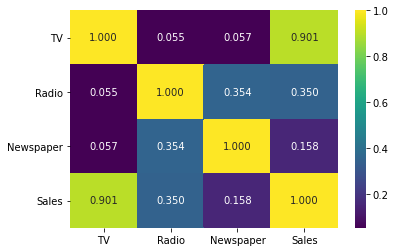

In [7]:
fig, ax= plt.subplots(figsize=(6,4))
sns.heatmap(data_lin_assumption.corr(), annot=True, fmt='0.3f', cmap='viridis',ax=ax);

- We see a high correlation coefficient btw TV and Sales, we can expect that they have linear relationship. 

- **Scatter Plot- Pair Plot : X(s) and y variables** 🐠
- Validate if there is a linear pattern btw x and y variables 
- Scatter Plot: 1 x variable
- Pair Plot: multiple x variables 

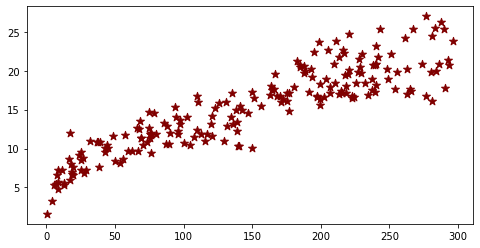

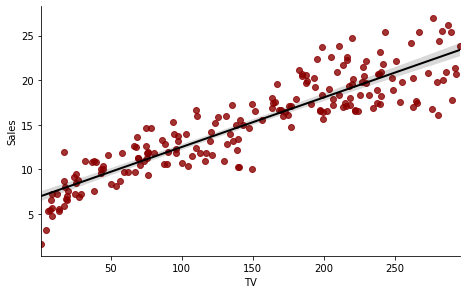

In [8]:
fig, ax= plt.subplots(figsize=(8,4))
# Scatter Plot
ax.scatter(x='TV', y='Sales', data= data_lin_assumption, color='maroon', 
          marker='*', s=70)
# Scatter plot with Regression line 
sns.lmplot(x='TV', y='Sales',data= data_lin_assumption,
          scatter_kws={'color':'darkred', 'marker':'^'}, line_kws={'color':'black', 'lw':2}, height=4, aspect=1.6);
# Pair Plot
# sns.pairplot(data_lin_assumption)

- Visually, we observe a linear pattern btw the 2. 

- **Scattter plot : Target-Predicted variables** 🕊
- In order to examine the linearity btw x and y, we fit a linear regression model of these 2, then plot real y values against predicted one. If they really have linear relationship, then the scatter points must closely align the x=y line. 

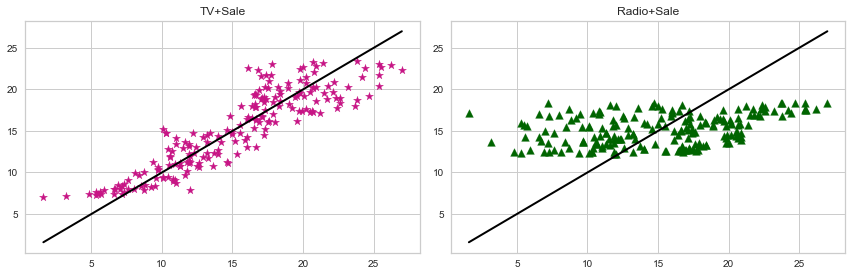

In [65]:
# For example, I want to check and compare the linearity of 2 pairs: (TV+Sales), (Radio+Sales) 🦀
x_tv= data_lin_assumption['TV'].values.reshape(-1,1)
y_tv= data_lin_assumption['Sales'].values.reshape(-1,1)
lin_model_tv= LinearRegression()
lin_model_tv.fit(x_tv,y_tv)
y_pred_tv= lin_model_tv.predict(x_tv)

x_radio= data_lin_assumption['Radio'].values.reshape(-1,1)
y_radio= data_lin_assumption['Sales'].values.reshape(-1,1)
lin_model_radio= LinearRegression()
lin_model_radio.fit(x_radio,y_radio)
y_pred_radio= lin_model_radio.predict(x_radio)

# Plotting
fig, ax=plt.subplots(ncols=2, figsize=(12,4))
line_dot_tv= np.linspace(np.amin(y_tv), np.amax(y_tv), 10000)
line_dot_radio= np.linspace(np.amin(y_radio), np.amax(y_radio), 10000)
ax[0].scatter(y_tv, y_pred_tv, marker='*', s=70, color='mediumvioletred')
ax[0].plot(line_dot_tv, line_dot_tv, linewidth=2, color='black')
ax[1].scatter(y_radio, y_pred_radio, marker='^', s=60, color='darkgreen')
ax[1].plot(line_dot_radio, line_dot_radio, linewidth=2, color='black')
ax[0].set_title('TV+Sale'); ax[1].set_title('Radio+Sale')
fig.tight_layout();

- **Residual Distribution** 🐾
- If x and y variables have linear relationship, then after fitting linear regression of these 2, the residuals are close to normal distribution. Conversely, if they're non-linear, then it is more likely residuals's distribution is skewed and far apart from normal one.  

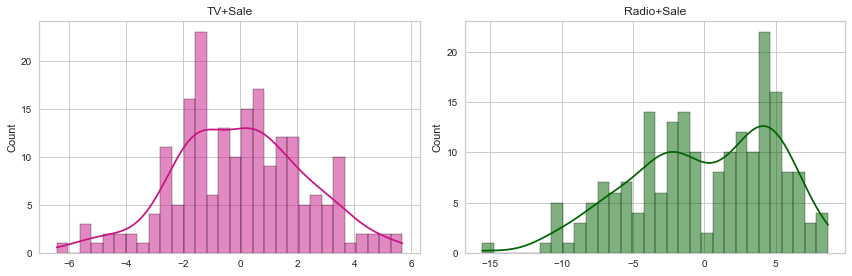

In [72]:
# For example, I want to check and compare the linearity of 2 pairs: (TV+Sales), (Radio+Sales) 🦀
residual_tv= y_tv- y_pred_tv
residual_radio= y_radio- y_pred_radio

# Plotting
fig, ax=plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(residual_tv.flatten(), bins=30, color='mediumvioletred', edgecolor='black', kde=True, ax=ax[0])
sns.histplot(residual_radio.flatten(), bins=30, color='darkgreen', edgecolor='black', kde=True, ax=ax[1])
ax[0].set_title('TV+Sale'); ax[1].set_title('Radio+Sale')
fig.tight_layout();

- So we can observe that the residuals from the pair (TV+Sale) is symetrical and closer to normal distribution than (Radio+Sale) pair which is obviously skewed. 

### NORMALITY CHECK 🐬 <a class="anchor" id="4"></a>

- **Histogram (Residuals)**
- Inspect whether distribution of residuals on train & test sets follow normal distribution. 

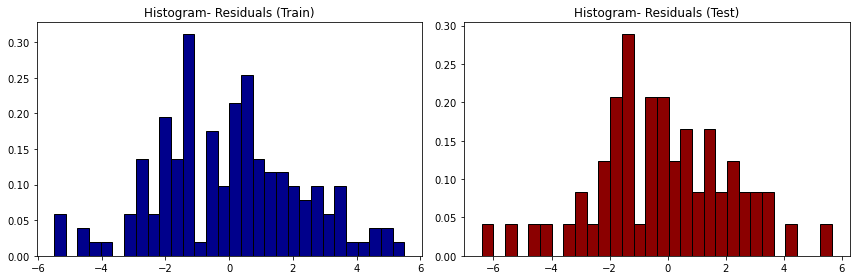

In [40]:
fig, ax=plt.subplots(ncols=2, figsize=(12,4))
ax[0].hist(residual_train, bins=30, color='darkblue', edgecolor='black' ,density=True)
ax[0].set_title('Histogram- Residuals (Train)')
ax[1].hist(residual_test, bins=30, color='darkred', edgecolor='black' ,density=True)
ax[1].set_title('Histogram- Residuals (Test)')
fig.tight_layout();

- **QQ-plot** 🐯

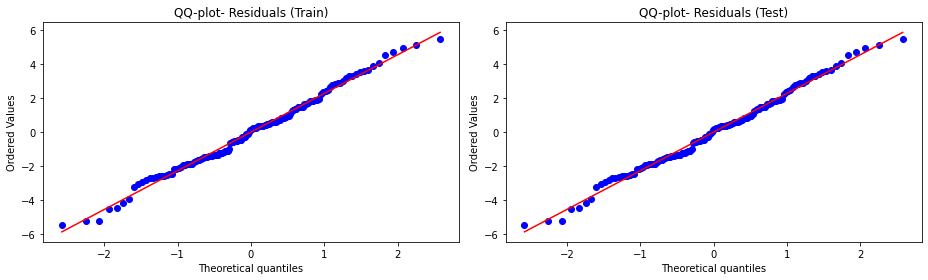

In [41]:
fig, ax=plt.subplots(ncols=2, figsize=(13,4))
stats.probplot(residual_train.flatten(), dist='norm', plot=ax[0])
stats.probplot(residual_train.flatten(), dist='norm', plot=ax[1])
ax[0].set_title('QQ-plot- Residuals (Train)')
ax[1].set_title('QQ-plot- Residuals (Test)')
fig.tight_layout();

- We observe that residuals on both train and test set closely fit the QQ-line, we can confident to conclude that they are normally distributed. 

- **Jarque-Bera Test** 🍜
- The test check whether the skewness and kurtosis of data match the one of normal distribution (skew=0, kurtosis=3)

In [23]:
display(stats.jarque_bera(residual_train),
        stats.jarque_bera(residual_test))

Jarque_beraResult(statistic=0.3923552266943497, pvalue=0.821866247298804)

Jarque_beraResult(statistic=0.16092151313125483, pvalue=0.9226911124413892)

- Since then p-value in both train and test set are large, hence we accept the H0 that residuals follow normal distribution. 

- **Kolmogorov-Smirnov test** 🍣
- The test check whether the distribution of dataset follows a specified distribution. 

In [19]:
display(stats.ks_2samp(residual_train.flatten(),
                       np.random.normal(np.mean(residual_train),np.std(residual_train),10**4)),
        stats.ks_2samp(residual_test.flatten(),
                       np.random.normal(np.mean(residual_test),np.std(residual_test),10**4)))

KstestResult(statistic=0.06287142857142858, pvalue=0.6229187183378911)

KstestResult(statistic=0.06673333333333334, pvalue=0.937103293873869)

- With these large p-value, we are quite certain that the residuals in both train and test set follow normal distribution. Besides, the evidence from test set is stronger than train set (0.94>0.62)

### HOMOSKEDASTICITY CHECK 🐇 <a class="anchor" id="5"></a>

- **Scatter Plot** 🦌
- we assume that the errors' variance is constant, hence if error's variance change as x(s) variables or y variable change, this is violated. But this way is time-consuming if there are too many x(s) variables. 

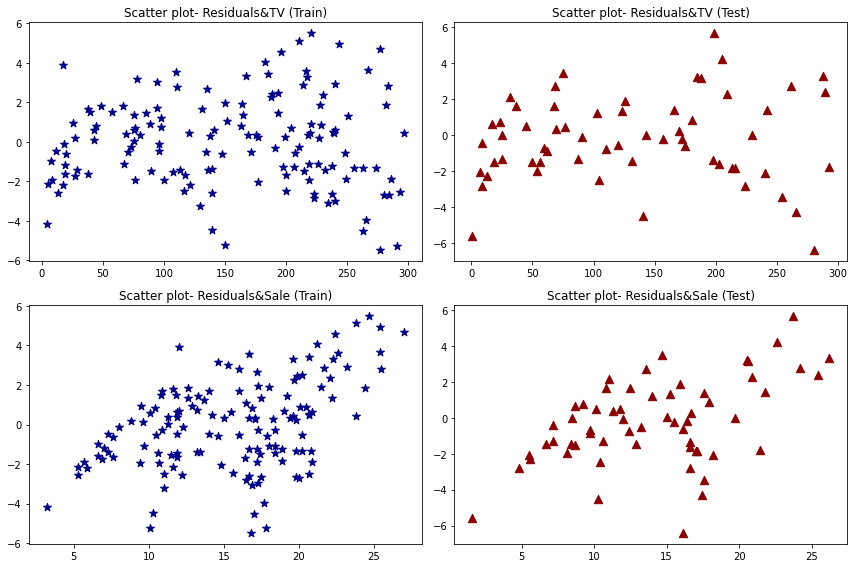

In [44]:
fig,ax= plt.subplots(nrows=2, ncols=2, figsize=(12,8))
# Train set- X variable
ax[0,0].scatter(X_train, residual_train, color = 'darkblue', marker='*', s=70)
ax[0,0].set_title('Scatter plot- Residuals&TV (Train)')
# Test set- X variable
ax[0,1].scatter(X_test, residual_test, color = 'darkred', marker='^', s=70)
ax[0,1].set_title('Scatter plot- Residuals&TV (Test)')
# Train set- y variable
ax[1,0].scatter(y_train, residual_train, color = 'darkblue', marker='*', s=70)
ax[1,0].set_title('Scatter plot- Residuals&Sale (Train)')
# Test set- y variable
ax[1,1].scatter(y_test, residual_test, color = 'darkred', marker='^', s=70)
ax[1,1].set_title('Scatter plot- Residuals&Sale (Test)')
fig.tight_layout()

- X variable: By eyeball inspection, we see no clear change in variance for train set, however for test set, it seems that the variance of residuals increase as value of TV increase. 
- Y variable: it seems that the model over-estimate value of sale (for low sale) and and under-estimate value of sale (for high sale)  

- **Levene Test- Bartlett Test** 🌸
- Used to test whether the residuals dataset have equal variances accross all of its k samples (Homogeneity of Variance) 9U can also use Balett Test if it is quite certain the residuals come from normal distribution) 
- There are in total 3 different 'center' method of test based on distribution of residuals: 
    - ‘median’: recommended for skewed distributions.
    - ‘mean’: recommended for symmetric, moderate-tailed distributions.
    - ‘trimmed’: recommended for heavy-tailed distributions

In [31]:
# From scatter plot above, we see that for test set,
# we observe an increase in variance of residuals as value of X increase, 
# we can confirm this by these 2 test, split the residuals into 2 samples, take 150 of TV values as threshold 
data_homo= pd.DataFrame({'X_test':X_test.flatten().tolist(),
                        'Residual':residual_test.flatten().tolist()})
mask= data_homo['X_test']<150
sample1= data_homo[mask]['Residual'].values
sample2= data_homo[~mask]['Residual'].values

In [49]:
display(stats.levene(sample1, sample2, center='mean'),
       stats.bartlett(sample1, sample2))

LeveneResult(statistic=4.651271561063571, pvalue=0.035188164154588704)

BartlettResult(statistic=4.142955919615586, pvalue=0.04180810352868915)

- With low p-value < 5%, we can reject the H0 of both Levene and Bartlett test that there is a homogeneity in variance. (at 95% confidence level)

- **White Test** 🌛
- Used to test whether homogeneity present in the residuals or not. The test use both t-test and F-test 

In [63]:
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
label= ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
white1= het_white(residual_train,sm.add_constant(X_train))
white2= het_white(residual_test,sm.add_constant(X_test))
display(dict(zip(label, white1)),
       dict(zip(label, white2)))

{'Test Statistic': 13.08450163788904,
 'Test Statistic p-value': 0.0014412408732217318,
 'F-Statistic': 7.062087560324116,
 'F-Test p-value': 0.0012049907949985704}

{'Test Statistic': 9.07598650321026,
 'Test Statistic p-value': 0.010694846900487838,
 'F-Statistic': 5.079442832167946,
 'F-Test p-value': 0.009332202723617025}

- The low p-values <1% in both train and test set are sufficient evidences to conclude that there is heteroskedasticity. 

### MULTICOLLINEARITY CHECK 🍀 <a class="anchor" id="6"></a>

- **Correlation Matrix- Scatter Plot** 🍉
- Same for linearity check, however, instead of inspecting linear relationship btw x(s) and y variable, we examine relationship amongst independent variables (x(s)) only. 
- High corr btw any 2 of x variables or linear trend in scatter plot can suggest an existence of multicollinearity. 

- **Variance Inflation Factor (VIF)** 🍑
- Measure of multicollinearity, the larger the VIF, the more likely there is multicollinearity (the lowest VIF is 1)
- We usually use the threshold of 5 (or even 10) to determine whether multi-collinearity exists. 

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif= data_lin_assumption.iloc[:,:-1]
vif_info = pd.DataFrame()
vif_info['Column'] = X_vif.columns
vif_info['VIF value'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_info.sort_values('VIF value', ascending=False)

,Column,VIF value
1,Radio,3.285462
2,Newspaper,3.055245
0,TV,2.486772


- Since all VIF values of X variables are in acceptable level (<5), so we can quite certain that there is no multi-collinearity. 

#### SOLUTIONS TO VIOLATIONS 🦀

- **Box-Cox Transformation** 🐕

- Used to transform non-normal variable into normal one 
- The formula is as follow: 
<img src="https://www.statisticshowto.com/wp-content/uploads/2015/07/boxcox-formula2.png" width="300" height="20">

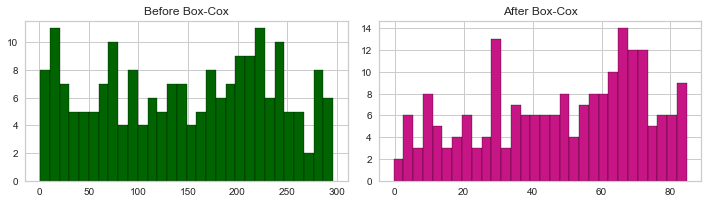

In [93]:
# Lets see how Box-Cox transform the TV variable 
X_new,_= stats.boxcox(X.flatten())
X_new= X_new.reshape(-1,1)
fig, ax= plt.subplots(ncols=2, figsize=(10,3))
ax[0].hist(X,bins=30,color='darkgreen',edgecolor='black')
ax[1].hist(X_new, bins=30,color='mediumvioletred',edgecolor='black')
ax[0].set_title('Before Box-Cox')
ax[1].set_title('After Box-Cox')
fig.tight_layout();

MSE train_new: 4.819054144820292, MSE test_new: 5.056179233364158
error mean train:5.075305255429287e-17, error mean test: -0.1455195567917295


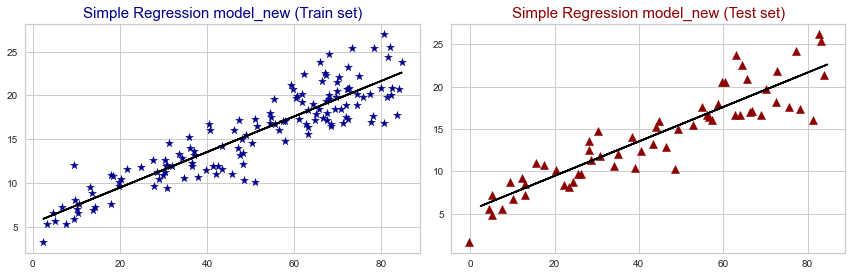

In [95]:
# Lets perform the the linear model again with transformed X variable(s)
# Spliting Train-Test
X_train_new, X_test_new, y_train_new, y_test_new= train_test_split(X_new,y,test_size=0.3, random_state=0)
# Create Scaler
sc= StandardScaler() # scale the value of X into N(0,1) unit
sc.fit(X_train_new)
# Initialize and Train the Linear regression model 
lin_model_new= LinearRegression()
lin_model_new.fit(sc.transform(X_train_new), y_train)
# Calculate residuals and MSE on train and test set 
y_pred_train_new= lin_model_new.predict(sc.transform(X_train_new))
MSE_train_new= mean_squared_error(y_train_new,y_pred_train_new)
residual_train_new= y_train_new-y_pred_train_new
y_pred_test_new= lin_model_new.predict(sc.transform(X_test_new))
MSE_test_new= mean_squared_error(y_test_new,y_pred_test_new)
residual_test_new= y_test_new-y_pred_test_new
print(f'MSE train_new: {MSE_train_new}, MSE test_new: {MSE_test_new}')
print(f'error mean train:{np.mean(residual_train_new)}, error mean test: {np.mean(residual_test_new)}')
# Visualization on train and test set 
fig,ax= plt.subplots(ncols=2, figsize=(12,4))
# Train set
ax[0].scatter(X_train_new, y_train_new, color = 'darkblue', marker='*', s=70)
ax[0].plot(X_train_new, y_pred_train_new , color = 'black')
ax[0].set_title('Simple Regression model_new (Train set)', color='darkblue', fontsize=15)
# Test set
ax[1].scatter(X_test_new, y_test_new, color = 'darkred', marker='^', s=70)
ax[1].plot(X_train_new, y_pred_train_new, color = 'black')
ax[1].set_title('Simple Regression model_new (Test set)', color='darkred', fontsize=15)
fig.tight_layout();

- We can see that the performance is better for transformed X-data (lower MSE), the error mean is more close to 0. Now,lets do some residual diagnostics. 

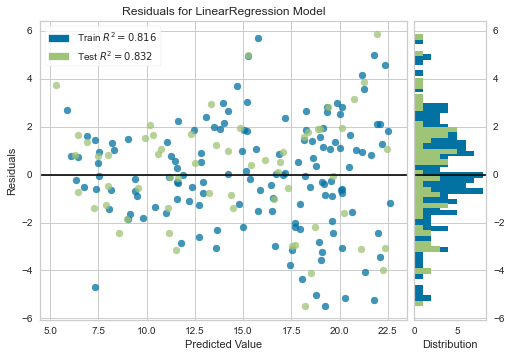

In [27]:
visualizer= ResidualsPlot(lin_model_new)  # Initalize residual visualizer
visualizer.fit(sc.transform(X_train_new), y_train_new)  # Fit the training data to the model
visualizer.score(sc.transform(X_test_new), y_test_new)  # Evaluate the model on the test data
visualizer.poof();

- The $R^2$ score is higher than initial one, for both train and test set. 
- Heteroskedasticity is still exist. (error variance is more likely to increase as Sale values increase)

- **Principle Component Analysis (PCA)** 🧁
- Used in case of multi-collinearity
- Used to reduce the dimension of X data and transform it by removing most of the dependency btw X variables. By retaining 'uncorrelated' data, it retain most of infomation of initial X data. 

In [89]:
data_lin_assumption.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [97]:
# For this example, we use all 3 variables TV,Radio, Newspaper as X variables 🍟
X_pca= data_lin_assumption.iloc[:,:-1]
y_pca= y
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_pca)
percentage_of_variation= np.round(pca.explained_variance_ratio_*100, decimals=1)
percentage_of_variation

array([91.4,  6.4,  2.2])

- This means that 91.4% of information in X data can be explained by 1st principal component. Hence, we transform original 3 dimensional X data into 1 dimensional data. 

Mean square error: 5.171148529465675
Mean of residuals: -1.9539925233402757e-15


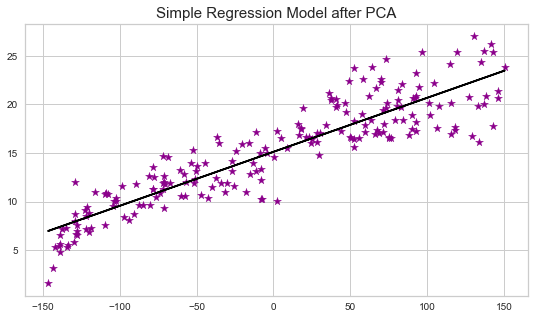

In [98]:
# Lets perform the linear regression after fitting PCA 🍣
pca = PCA(n_components = 1)
X_pca = pca.fit_transform(X_pca)
lin_model_pca= LinearRegression()
lin_model_pca.fit(X_pca, y_pca)
y_pred_pca= lin_model_pca.predict(X_pca)
print(f'Mean square error: {mean_squared_error(y_pca, y_pred_pca)}')
print(f'Mean of residuals: {np.mean(y_pca-y_pred_pca)}')
# Plotting
fig, ax=plt.subplots(figsize=(9,5))
ax.scatter(X_pca, y_pca, marker='*', color='darkmagenta', s=70)
ax.plot(X_pca, y_pred_pca, color='black')
ax.set_title('Simple Regression Model after PCA', fontsize=15);